<a href="https://colab.research.google.com/github/Edivaldo16/projeto_python_pandas/blob/main/Projeto_An%C3%A1lise_de_dados_com_Python_e_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Análise de dados com Python e Pandas

In [2]:
import pandas as pd # Importando biblioteca "pandas" como "pd"

In [41]:
df = pd.DataFrame({"A": [1, 2, 3, 4, 5], "B": [4, 5, 6, 9, 13], "C": [3,7,8,13,15], "D": [8,15,25,9,11], "E": [8,15,25,9,11]})

In [42]:
df

,A,B,C,D,E
0,1,4,3,8,8
1,2,5,7,15,15
2,3,6,8,25,25
3,4,9,13,9,9
4,5,13,15,11,11


In [46]:
df = df.rename(columns={"A": "Pão", "B":"Barbecue", "C": "Tomate", "D":"Cebola", "E":"Abacaxi"})

In [93]:
# Criando a coluna "Hamburguers"

df["Hamburguers"] = df["Pão"].mul(df["Tomate"])
df

,Pão,Barbecue,Tomate,Cebola,Abacaxi,Hamburguers
0,1,4,3,8,8,3
1,2,5,7,15,15,14
2,3,6,8,25,25,24
3,4,9,13,9,9,52
4,5,13,15,11,11,75


In [ ]:
# Importando arquivo Bauru

df1 = pd.read_excel("Bauru.xlsx")

# df = pd.DataFrame({"Pão": [10,25, 8, 9, 14], "Queijo": [, 4, 11, 12, 15], "Presunto": [8, , , 13, 20], 
# "Requeijão": [7,5,12,,4], "Orégano": [6, 9, 15,9, ]})
df1

In [83]:
# Consultando linhas com valores faltantes

df1.isnull().sum()

Pão          0
Queijo       1
Presunto     2
Requeijão    1
Orégano      1
dtype: int64

In [119]:
# Substituindo os valores nulos por zeros - Linha a Linha

#df1["Queijo"].fillna(df1["Queijo"].min(), inplace = True) # substituição do obejto em memória
#df1["Presunto"].fillna(df1["Presunto"].min(), inplace = True) # substituição do obejto em memória
#df1["Requeijão"].fillna(df1["Requeijão"].min(), inplace = True) # substituição do obejto em memória
#df1["Orégano"].fillna(df1["Orégano"].min(), inplace = True) # substituição do obejto em memória

# Método simplificado:
df1.fillna(df1.min(), inplace = True)

In [120]:
df1

,Pão,Queijo,Presunto,Requeijão,Orégano,Bauru
0,10,4.0,8.0,7.0,6.0,60.0
1,25,4.0,8.0,5.0,9.0,225.0
2,8,11.0,8.0,12.0,15.0,120.0
3,9,12.0,13.0,4.0,9.0,81.0
4,14,15.0,20.0,4.0,6.0,84.0


In [ ]:
df1["Bauru"] = df1["Pão"].mul(df1["Orégano"])
df1

### Lanchone: Burgueria e Bauru

In [151]:
# Juntando todos os arquivos

a = pd.concat([df,df1])

In [152]:
a

,Pão,Barbecue,Tomate,Cebola,Abacaxi,Hamburguers,Queijo,Presunto,Requeijão,Orégano,Bauru
0,1,4.0,3.0,8.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN
1,2,5.0,7.0,15.0,15.0,14.0,NaN,NaN,NaN,NaN,NaN
2,3,6.0,8.0,25.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN
3,4,9.0,13.0,9.0,9.0,52.0,NaN,NaN,NaN,NaN,NaN
4,5,13.0,15.0,11.0,11.0,75.0,NaN,NaN,NaN,NaN,NaN
0,10,NaN,NaN,NaN,NaN,NaN,4.0,8.0,7.0,6.0,60.0
1,25,NaN,NaN,NaN,NaN,NaN,4.0,8.0,5.0,9.0,225.0
2,8,NaN,NaN,NaN,NaN,NaN,11.0,8.0,12.0,15.0,120.0
3,9,NaN,NaN,NaN,NaN,NaN,12.0,13.0,4.0,9.0,81.0
4,14,NaN,NaN,NaN,NaN,NaN,15.0,20.0,4.0,6.0,84.0


In [153]:
# Substituindo os valores nulos por zeros

a.fillna(0, inplace = True) # substituição do obejto em memória

In [154]:
# Comando que traz os maiores valores de uma deternimada coluna 'variável'.nlargest(quantidade, "Coluna")

a.nlargest(3, "Hamburguers")

,Pão,Barbecue,Tomate,Cebola,Abacaxi,Hamburguers,Queijo,Presunto,Requeijão,Orégano,Bauru
4,5,13.0,15.0,11.0,11.0,75.0,0.0,0.0,0.0,0.0,0.0
3,4,9.0,13.0,9.0,9.0,52.0,0.0,0.0,0.0,0.0,0.0
2,3,6.0,8.0,25.0,25.0,24.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# Comando que traz os menores valores de uma deternimada coluna 'variável'.nsmallest(quantidade, "Coluna")

a.nsmallest(2, "Abacaxi")

,Pão,Barbecue,Tomate,Cebola,Abacaxi,Hamburguers,Queijo,Presunto,Requeijão,Orégano,Bauru
0,10,0.0,0.0,0.0,0.0,0.0,4.0,8.0,7.0,6.0,60.0
1,25,0.0,0.0,0.0,0.0,0.0,4.0,8.0,5.0,9.0,225.0


In [128]:
# Agrupamento por cidade

a.groupby("Barbecue")["Hamburguers"].sum()

Barbecue
0.0      0.0
4.0      3.0
5.0     14.0
6.0     24.0
9.0     52.0
13.0    75.0
Name: Hamburguers, dtype: float64

In [155]:
# Ordenando o conjunto de dados

a.sort_values("Pão", ascending = True).head(10) # O comando ascending = false, retorna os valores do maior para o menor

,Pão,Barbecue,Tomate,Cebola,Abacaxi,Hamburguers,Queijo,Presunto,Requeijão,Orégano,Bauru
0,1,4.0,3.0,8.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0
1,2,5.0,7.0,15.0,15.0,14.0,0.0,0.0,0.0,0.0,0.0
2,3,6.0,8.0,25.0,25.0,24.0,0.0,0.0,0.0,0.0,0.0
3,4,9.0,13.0,9.0,9.0,52.0,0.0,0.0,0.0,0.0,0.0
4,5,13.0,15.0,11.0,11.0,75.0,0.0,0.0,0.0,0.0,0.0
2,8,0.0,0.0,0.0,0.0,0.0,11.0,8.0,12.0,15.0,120.0
3,9,0.0,0.0,0.0,0.0,0.0,12.0,13.0,4.0,9.0,81.0
0,10,0.0,0.0,0.0,0.0,0.0,4.0,8.0,7.0,6.0,60.0
4,14,0.0,0.0,0.0,0.0,0.0,15.0,20.0,4.0,6.0,84.0
1,25,0.0,0.0,0.0,0.0,0.0,4.0,8.0,5.0,9.0,225.0


In [168]:
a["Data"] = pd.DataFrame({"Data": ["2021-08-10", "2021-09-15", "2021-07-27", "2021-04-01", "2021-08-17", "2021-08-19",
"2021-09-15","2021-08-25","2021-08-30", "2021-05-14"]})

In [143]:
a.dtypes


Pão              int64
Barbecue       float64
Tomate         float64
Cebola         float64
Abacaxi        float64
Hamburguers    float64
Queijo         float64
Presunto       float64
Requeijão      float64
Orégano        float64
Bauru          float64
Data            object
dtype: object

In [170]:
# Transformando alguma determinada coluna em data

a["Data"] = pd.to_datetime(a["Data"])

In [165]:
a.dtypes

Pão              int64
Barbecue       float64
Tomate         float64
Cebola         float64
Abacaxi        float64
Hamburguers    float64
Queijo         float64
Presunto       float64
Requeijão      float64
Orégano        float64
Bauru          float64
dtype: object

In [171]:
# Agrupamento por ano

a.groupby(a["Data"].dt.year)["Tomate"].sum()

Data
2021    46.0
Name: Tomate, dtype: float64

In [172]:
# Extraindo o dia. mês e ano

a["dia_venda"], a["mes_venda"], a["ano_venda"]  = (a["Data"].dt.day, a["Data"].dt.month, a["Data"].dt.year)

In [173]:
a

,Pão,Barbecue,Tomate,Cebola,Abacaxi,Hamburguers,Queijo,Presunto,Requeijão,Orégano,Bauru,Data,dia_venda,mes_venda,ano_venda
0,1,4.0,3.0,8.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,2021-08-10,10,8,2021
1,2,5.0,7.0,15.0,15.0,14.0,0.0,0.0,0.0,0.0,0.0,2021-09-15,15,9,2021
2,3,6.0,8.0,25.0,25.0,24.0,0.0,0.0,0.0,0.0,0.0,2021-07-27,27,7,2021
3,4,9.0,13.0,9.0,9.0,52.0,0.0,0.0,0.0,0.0,0.0,2021-04-01,1,4,2021
4,5,13.0,15.0,11.0,11.0,75.0,0.0,0.0,0.0,0.0,0.0,2021-08-17,17,8,2021
0,10,0.0,0.0,0.0,0.0,0.0,4.0,8.0,7.0,6.0,60.0,2021-08-10,10,8,2021
1,25,0.0,0.0,0.0,0.0,0.0,4.0,8.0,5.0,9.0,225.0,2021-09-15,15,9,2021
2,8,0.0,0.0,0.0,0.0,0.0,11.0,8.0,12.0,15.0,120.0,2021-07-27,27,7,2021
3,9,0.0,0.0,0.0,0.0,0.0,12.0,13.0,4.0,9.0,81.0,2021-04-01,1,4,2021
4,14,0.0,0.0,0.0,0.0,0.0,15.0,20.0,4.0,6.0,84.0,2021-08-17,17,8,2021


In [176]:
# Retornando a data mais antiga 

a["Data"].min()

Timestamp('2021-04-01 00:00:00')

In [177]:
# Retornando a data mais recente 

a["Data"].max()

Timestamp('2021-09-15 00:00:00')

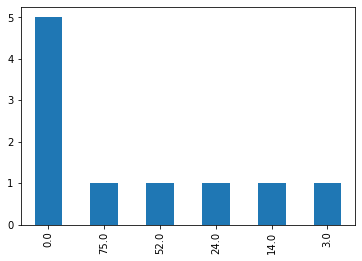

In [178]:
# Gráfico de Barras Vertical sobre os dados da Variável "Hamburguers"

a["Hamburguers"].value_counts(ascending = False).plot.bar();

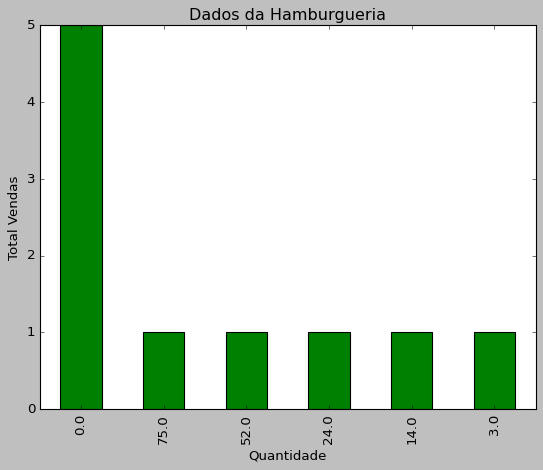

In [190]:
# Adicionando um título e alterando o nome dos eixos

import matplotlib.pyplot as plt

plt.style.use('classic')
a["Hamburguers"].value_counts().plot.bar(title="Dados da Hamburgueria", color="green")
plt.xlabel("Quantidade");
plt.ylabel("Total Vendas");